## The Logic of Inference
### Weber, POL 683, September 24, 2020
###  This chapter accompanies Gelman and Hill, Chapters 2 and 3, Long, Chapters 1 and 2. Please do not share, distribute or cite. These are course notes.

This class involves much more than finding a model that is appropriate for a given data structure. In fact, we will often return to two themes in inferential statistics, which may be labeled the ***frequentist*** and ***Bayesian*** traditions. In some circumstances, these two traditions will yield very similar results, though the interpretations vary. During these first two weeks, we'll consider these two perspectives from a theoretical angle; throughout the rest of the term, we'll review techniques to use these perspectives in inference.

It's worthwhile to understand the motivating principles of these two approaches, prior to digging into the nuts and bolts of estimation. Most likely, many of you have received training in the ___frequentist___ tradition of probability, which is often credited to Jerzy Neyman, Karl Pearson and Sir Ronald Fisher. The logic here is quite simple: Probability refers to an average observed across numerous trials. Probabilities, as you probably know, emerged from better understanding games of chance.

Take the classic example of rolling a die. The probability of rolling a 1 (or any number, with a fair die) is 1/6. This number is of limited value in predicting the outcome of a single roll. Instead, what it means is that in a series of trials, approximately 1/6 of those trials will yield a 1. We could ask a variant of a classic game of chance question, which is if we have 10 trials, and each trial involves rolling two dice,is it beneficial to bet that at least one of those trials will yield two 1's (see https://en.wikipedia.org/wiki/Problem_of_points)? The probability of observing two ones is 1/6 $\times$ 1/6 $=$ 1/36. This implies that the rest of the sample space (i.e., not rolling two ones) is 35/36. Since the rolls are independent, then the probability that two ones are not observed in 10 trials is $(35/36)^{10}=0.75$ -- thus one should probably ***not*** bet on ``snake eyes.''

Much of what you have likely learned in statistics courses implements a similar logic. For instance, a confidence interval is not a statement of certainty regarding whether the derived interval contains the true population value. You were likely instructed, early on, that statements such as ``there's a 95\% chance the mean falls between (lower.bound) and (upper.bound)'' is incorrect. Instead, we make the assumption that the population mean is fixed. If we were to repeatedly draw samples from a population and calculate a confidence interval, approximately 95\% of those intervals would capture the population value value. 

In fact, the very logic of inference hinges on the notion of drawing a subset of the population (a sample) and making an inference about the general population from that sample. Yet, the ***frequentist*** approach forces us to think of the population parameter as fixed -- we simply don't have it because it would be expensive to collect  -- and the methods we use to make inferences nearly always hinge on this notion of taking repeated samples from a population. Just recall the ***central limit theorem***, ***the standard error***, ***confidence intervals***, ***p-values***, and ***Type I*** and ***Type II*** errors. These concepts all rely on the notion of repeated observation; hence, the ``frequentist'' label. Let's take a step back and consider what this means from the perspective of social science and sampling. Then, I think you'll see what I mean when I use the term \emph{frequentist}.


### A Step Back
In this class, and really in most everything you've worked on, the focus of the research is rarely on individual observations but rather distributions. We can summarize data, and relationships between variables, based on distributions. For example, recall that in linear regression, one of the assumptions is the error process follows a parametric distribution (often the normal distribution). Moreoever, if we have a dependent variable that is clearly not normal and continuous, then this assumption becomes tenuous.

Recall the differences between a probability density function (PDF) and a continuous density function (CDF). A PDF gives the probability of an occurence (for a discrete variable) or a range of occurences (for a continous variable).

### Notation

(1) A CDF is written as F(x), or capital greek notation, e.g., $\Gamma(x)$.

(2) A PDF is written in lower case font, f(x), and we can find any area under a PDF by summation (for categorical data), and integration (for continuous data). That is,

$$p(a<x<b)=\sum_i^{K} x_i$$

$$p(a<x<b)=\int f(x) dx$$

As such, $F(\infty)=1$, and $F(-\infty)=0$, and $p(-\infty < x < \infty)=\int_{-\infty}^{\infty}f(x)dx=1$. This is an important principle, which occasionally is forgotten. The sum of the total under a probability distribution (continuous variable) or probability mass (discrete variable) must be 1. We can plot a distribution across $x$ that displays the probabilities across values of $x$. For a discrete distribution, the $y$ axis represents the probablity of observing discrete outcome $x$; for a continuous outcome, the $y$ axis represents a ratio, which is the probability of observing $x$ within an (infintesimally small) interval divided by the width of that interval. This ``density'' need not be 1 -- in fact, it's often not -- rather, the area under that distribution must be 1. Kruschke (2011) uses a nice analogy. Consider a sponge. The mass of the sponge represents the probability. Density is $mass/volume$. If we squeeze the sponge, the mass doesn't change, though it's density clearly does. Here, volume, is simply the range of $x$.

We should also be clear about notation. Oftentimes, we deal with two variables, $x$ and $y$. We'll often refer to things such as **What is the probability of observing $x$ averaged, or marginalized, across $y$**? 

This is relatively easy to envision in a 2x2 table, in which we sum across rows or columns. The appropriate operation is then: 

$$p(x)=\sum_y p(x_i, y_i) \hspace{0.5in}  \texttt{Marginal Probability}$$

Note, this only applies to a categorical distribution. Though, as we'll see, the continuous version is really just an extension of this.

We can find the probability of observing x by averaging across y. Take a simple example, which I found on  the 538.com site. The dataset is the probability that a professional wrestler will die young.\footnote{Details about the data collection are available here \url{http://fivethirtyeight.com/datalab/are-pro-wrestlers-dying-at-an-unusual-rate/}}. Here's the data:


In [3]:
data<-matrix(c(1,31,9,162),
             nrow=2)
rownames(data)<-c("35-40", "40+")
colnames(data)<-c("dead", "not dead")
print(data)
prop.table(data, 1)
prop.table(data, 2)
prop.table(data)



      dead not dead
35-40    1        9
40+     31      162


,dead,not dead
35-40,0.1000000,0.9000000
40+,0.1606218,0.8393782


,dead,not dead
35-40,0.03125,0.05263158
40+,0.96875,0.94736842


,dead,not dead
35-40,0.004926108,0.04433498
40+,0.152709360,0.79802956


The marginal probabilities for age: If one is 35-40, there is a 0.90 probability of being alive. If one is 40+ there is a 0.84 probability of being alive. The marginal probabilities for "death": If one has died, there is a 96% of being 40+. This should make sense given the scarcity of 35-40 year olds dying ($n=1$). The marginal probabilities are just the "row" and "column" probabilities. The "joint probabilities" are the cell probabilities.Thus, we can simply ask, ``what is the probability a wrestler has died?'' What is the answer?

$$p(Death)=\sum_{age} p(death, age)$$



The operation asks us to sum the joint probabilities of $death \cap age$. One wrestler 35-40 has died; 31 have died who are 41+. In total, 32 have died 203. The probability of death is an astonishing $32/203=0.15$ (Again, I'm not certain of the data quality -- this is just an in-class example, not a serious analysis of professional wrestling). It is the sum of the individual probabilites across age divided by the probability of observing the of age category $$(1+31)/sum(data))$$. How do we interpret this probability? Is wrestling dangerous?



## A Simulation

In [13]:
### A Coin Example
require(dplyr)
#initialize draw vector

print("In a sample of 100, the Dead/Alive distribution is:")
sample(c("Dead", "Alive"), 100, replace=TRUE, prob=c(0.15, 0.85))  %>% table() ### Any given sample is far from 50-50

niter=10e3
draws=matrix(c(NA), nrow=niter, ncol=2)
for (iter in 1:niter){
  sample<-sample(c("Dead", "Alive"), 100, replace=TRUE, prob=c(0.15, 0.85))  %>% table() %>% as.numeric()
  draws[iter,]<-sample
}

print("In a sample of 100, taken 10000 times the Dead/Alive distribution is:")

### The average of the trials is ###
apply(draws, 2, mean)

print("In a sample of 1000, the Dead/Alive distribution is:")
sample(c("Dead", "Alive"), 10000, replace=TRUE, prob=c(0.15, 0.85))  %>% table()/10000 ### Any given sample is far from 50-50




[1] "In a sample of 100, the Dead/Alive distribution is:"


.
Alive  Dead 
   82    18 

[1] "In a sample of 100, taken 10000 times the Dead/Alive distribution is:"


[1] 85.0503 14.9497

[1] "In a sample of 1000, the Dead/Alive distribution is:"


.
 Alive   Dead 
0.8554 0.1446 

It's actually really important to see the differences. In a relatively small sample $n=100$ we observe something close, but not identical to the empirical distribution. In the second example, we observe a sample of samples -- consider the ***Central Limit Theorem*** for instance. In particular, I sample $n=100$ samples, take the average, and I do this $10000$ times. I then take the average of averages. Notice they converge on the true distribution. Why? Now, consider the third case. We are taking a sample of 10000 individuals and then averaging. Below you'll see the reason this matters, as it speaks to the small versus asymptotic properties of an estimator. Here, the estimator is $\theta=p(Dead)$. 

Distributions are also used to describe continuous variables. In fact, much of the applications in this class will assume a continous distribution, even if we only observe a discrete response option. In your first semester statistics course, you reviewed the properties of a variety of continuous distributions -- I assume, the ***normal, poisson, Student's T, F***, and so forth. One can use univariate calculus -- integration, in particular -- to calculate various areas under the curve. If this is foreign to you, because you forgot it or didn't quite grasp the concept from your first semester class, I strongly recommend you go back and review this material. We cannot spend much time on reviewing the basics of integration, and we will use it frequently in this class. Back to the issue at hand. For a continuous bivariate density, then

$$p(x)=\int p(x, y) dy \hspace{0.5in}  \texttt{Marginal Probability}$$

Notice here the only difference is the $\int$ instead of $\sum$. But, it's useful to think of them as calling for the same thing. Then the $dy$ simply means "averaged across y." Sometimes we say that this operation entails "integrating out y," or "averaging across y."

There are also conditional probabilities; these are not the same as marginal probabilities. For instance, we might ask, ***what is the probability that a wrestler has died, given he/she is 35-40?*** So, $p(X=(death) | Y=35-40)$. In continuous distributions:

$$p(x|y)=p(x,y)/p(y)\hspace{0.5in}  \texttt{Conditional Probability}$$

where, $p(x)=\sum_y p(x, y)$ or $p(x)=\int p(x, y) dy$. In other words, we are taking the joint probability of two things happening, here $p(x,y)$, and dividing the joint probability by the marginal probability of observing y, $p(y)$. Think of it as the joint probability weighted by the marginal probability.

We have seen how we might use ***R*** to estimate a conditional probability. This is fairly simple to see from the cross-tabs as well. What is the probability a wrester has died (in the sample), given that he/she is 35-40? We need the joint probability of of $p(Death \cap 35-50)= 0.0049$. And, we know from above the probability of death is 0.15. Thus, $0.0049/0.15=0.03$.


And, finally, we will almost always assume independence, such that the probability of one outcome does not depend on the probability of a second outcome. In a bivariate distribution, this means

$$p(x,y)=p(x) p(y) \hspace{0.5in}  \texttt{Independence}$$ 

This is actually quite intuitive if you think about it. If $p(x)$ and $p(y)$ are entirely unrelated -- knowing one does not help you know the other -- then the probability of observing the two events is simply the product. If I flip a coin from 1989 and one from 1977, the flips will (likely) be independent. Knowing the outcome of the 1989 coin flip is inconsequential for the outcome of the 1977 coin flip. By extension, if two events are independent, then the conditional probability $p(x|y)=p(x)$. Think briefly about what this means in context of the coin flip. Given that the Canadian coins is head, what is the probability that the 1989 coin is heads? 

So, why all the fuss about probabilites? Well, we can use these three basic principles from probability to very easily derive what is called, Bayes' Rule, named after the mathematician Reverand Thomas Bayes.

### Conditional Probabilities, Continued: Bayes' Rule
  
As Kruschke (2011) notes, if 

$$p(x|y)=p(x,y)/p(y)$$

Then it follows that we can also find $p(y|x)$. First multiply the equation by $p(y)$ 

$$p(x|y) p(y)=p(x,y) $$

But, remember, we can find the joint probability, $p(x,y)$ as

$$p(y|x) p(x)=p(y,x) $$

Meaning,

$$p(x|y) p(y)=p(y|x) p(x)$$

Bayes' Rule is simply,

$$p(y|x) =[p(x|y) p(y)]/p(x)$$
 
Briefly, this allows us to answer the question, "Given that a wrestler has died, what is the probability that he/she is 35-40?" Notice, that we could simply solve this by inverting the rows and columns in the above example. What Bayes' Rule tells us, is that we may simply calculate this value by knowing the the conditional probability of death given age, and the marginal probability of observing age 35-40 and death in our sample.

We'll rely heavily on this basic principle, extending it in a number of interesting ways. For now, it's more than sufficient to simply understand that Bayes' Rule is really just a reordering of what we know about conditional probabilities. It's no more complex than solving for the row marginal probabilities when one knows the columns, and vice-versa.



### Two Traditions

We will rely on probability densities a lot in this class. There are a variety of ways to describe, or summarize a distribution of data (or a theoretical distribution). Much of this class focuses on probability. Chapters 2 and 3 in King (1998) are also good references. 

In statistics, we often (indirectly) use probabilities in the relativistic sense. We think of it as trials or experiments that are repeatable, aka the frequentist interpretation. For instance, the point estimate of Donald Trump winning the Republican nomination in 2020 may be 0.95. This statement of uncertainty can only be intepreted in the relativistic sense. If we were able to conduct a survey over and over and over again, in the long run, we are assuming Trump would would ***win*** 95 out of 100 times, if the primary nomination process were replicated under identical conditions 100 times. In fact, in any one of these he'll either win or lose, just as you'll only win or lose if you play a game of chance. If the probability of winning in a game of chance is 0.001, then if you were to play that game 100 times, you can expect to win approximately once!

We often use probability in the ***subjective*** sense, by referring to the probability of single occurence. We do this at our own peril, for often human estimates of probability are inaccurate. For instance, take the simple observation that many Americans took to the road rather than flying, following September 11. Yet, the probability of dying in a terrorist attack in the U.S. has always been far less than dying in an automobile accurate. Humans tend to overstate the probability of being subject to traumatic, emotionally vivid events.

Up until this point, nearly all the statistical models we have discussed model the probability that a particular dataset was generated by a model $p(y|M)$ -- or what is the probability of observing $y$ given our model? Put a better way, we model $p(D|Y)$, the probability of observing data given $y$ (King 1998). As King (1998), and many others have pointed out, this isn't exactly what we're interested in in quantitative settings; instead, we often wish to make probabilitistic statements about the model itself, $p(M|D)$. We generally would like to know the probability that our model was generated from our data. 

King (1998) notes that the concept of likelihood may be a reasonable substitute, where $P(Y|M)$. Alternatively, we may approximate the inverse probability (that we often want), by using Bayes' Rule

$$p(M|D) =[p(D|M) p(M)]/p(D)$$

The inverse probability is then a function of the likelihood, as well as the probability of observing the model ***and*** the probability of observing the data. It turns out that since the denominator is a normalizing constant, which renders the numerator into a valid probability, it is proportional to the product absent $p(D)$.

$$p(M|D) = p(D|M) p(M)/p(D)$$ 

$$p(M|D) \propto p(D|M) p(M)/p(D) $$

What this establishes is these two principles: Frequentism versus Bayesian inference. Typically, we're interested in the Bayesian version of the probability statement -- __what is the probability that our data produced a model?__ The frequentist version, which draws on what is called the likelihood, really posits something different, and that is, __what is the probability that a model produced our data?__

At this point, it's worthwhile to use an example. We'll use the principle of ``maximum likelihood'' first, since the likelihood equation is part of Bayes' Rule (do you see why?). Then, we'll apply it to Bayesian statistics. We'll also start really, really simple example, with a single parameter: The case of flipping a coin.



## A Simple Movitating Example: Coinflips

We're going to operate from the assumption that a coin is fair, which simply means the probability of observing an H is the same as the probability of observing  T. In this case, $y \in [0 , 1]$. And let's just say that:

$$y = {1, H, \theta=0.5}\atop  {0, T, 1-\theta=0.5} $$

So, we're just labeling heads 1, tails 0. Each has an equal probability. Let's call this population parameter governing the behavior of the coin, $\theta$.  Because we know what $\theta$ is, by assuming the coin is fair, it is easy to find the probability of observing a particular string of heads, tails, or some combination. 

Let's also assume \emph{independent} trials. What this means is one trial is independent of a subsequent trial. Then the joint probability of observing a (H,H) is simply $0.5 \times 0.5=0.25$.\footnote{But, perhaps we have some reason to expect the coin is not fair, and $\theta=0.3$ (the coin is biased in favor of T). Then, the probability of observing a H,H,T is $0.3 \times 0.3 \times 0.7$}. Recall from the previous section we could simply express these independent coin flips in a formal expression, as 

$$p(heads)=\theta^y(1-\theta)^{1-y}$$

And, across $n$ independent trials trials,

$$p(k)=\prod\theta^y_i(1-\theta)^{1-y_i}$$
$$=\theta^k(1-\theta)^{n-k}$$

Since $\textbf{y}=y_1, y_2...y_n$ is observed and we are making an assumption about the constituent probabilties, all we need to do is multiply the probability of each outcome, here denoted by $\prod$

Likewise, we could just use the binomial distribution to calculate this probability (call $K$ an observed sequence).

\begin{eqnarray}
p(K | \theta, N)= {n \choose k} \theta^K(1-\theta)^{N-K}
\end{eqnarray}

Turn the question on it's head. We've assumed that $\theta$ is known, allowing us to generate a valid probability distribution for some observed sequence. However, $\theta$ -- the statistical parameter -- is usual what we want to estimate. It exists in the population, but it is not directly accessible.\footnote{It turns out this statement is akin to a frequentist definition. We could use Bayesian statistics to model the probability distribution for this parameter.} However, we assume it could accessed, if we had resources to access the total population. Of course, we rarely can access the whole population -- if we could, what would be the point of inference -- and instead we make an inference about this parameter. It's perhaps easiest to consider with coin flips. For a given coin, we assume $\theta$. If we approach the trials with an assumption of a fair coin, we simply posit that $\theta=0.5$. But, what if we are not able to generate such a concrete assumption about $\theta$? 

Instead, suppose we only have access to an observed series coin flips. Instead of approaching the problem from the issue of, ***What is the probability of observing two heads in a series of 10 flips, given a fair coin?*** we might ask, ***Given 2 observed heads out of 10, what is the most probable value of $\theta$***? Or, ***Is the coin fair?*** It shouldn't take much convincing that this is a qualitatively different question. It's also the question we commonly ask ourselves in applied research. In particular, ***Given the data available, what is the most likely parameter or set of parameters to generate the data?*** In this case, __parameter__ may be an estimate about how many people will vote for a candidate, a slope coefficient, and so forth. An alternate way to think of this is $p(D|M)$ -- or what is the probability of observing the data, given the model (King 1998).

Although you may not have seen this notation yet, all our statistic models assume we want to maximize the likelihood that an estimated population value produced a dataset, called $D$, so $p(D | \theta)$. This is also why I've been following this convention. Consider the logic of minimizing the sum of squared errors. If $\theta$ simply represent a vector of slope coefficients, recall that the logic of OLS is to minimize the squared discrepancy between the observed and predicted values. Though we can estimate an infinite number of $\theta$ values, only one will meet the criterion of minimizing the sum of squared residuals. This is equivalent to asking ourselves, __what is a set of $\theta$ values that maximizes the likelihood of observing a particular dataset?__ in that finding $\theta$ that minimizes the SSR will also maximize the probability of observing a particular dataset. 

This is the logic underlying a technique that we will use throughout this semester, which is called "maximum likelihood." In the linear model, the maximum likelihood estimator and the OLS estimator will yield the same results; yet, the logic of minimizing SSR is not applicable to many other data situations (e.g., a binary dependent variable). Thus, we may use the logic of ML to estimate a variety of models.

Returning to the motivating example: What is $\theta$ in a series of coin flips. Maximum likelihood is a technique to estimate parameters in a model, not unlike the principle of least squares. The logic -- and not so much math -- is as follows. Let's call $\theta$ some set of parameter estimates and $D=(y_1....y_n)^T$ is the observed data. The probability of observing vector, $D|\theta$ is simply the product of all individual values of $y_i | \theta$, if values are independently observed. Thus, the probability of observing H,H,T with a fair coin is simply $0.5 \times 0.5 \times 0.5$.

This should make intuitive sense, since our observations are assumed to be independently and identically distributed, where unit $i$'s probability is independent of unit $-i$. Formally, $L(\theta)=\Pi p(y_i | \theta)$. Thus, the likelihood equation is the probability of observing $y$ given some "best guess" of $\theta$. Below, we'll very briefly develop a few techniques to formulate this __best guess.__


Since we don't know $\theta$ we need to make a guess. We then need a decision rule to decide on which guess is the **best guess.** It is this simplistic statement which is often the most challenging. Often the likelihood function doesn't have a ``closed form'' solution, requiring approximation methods to find an optimal solution. We can think of many different possible values of $\theta$, but which one maximizes the chance of observing the data? If, for instance, we were to observe -- out of 100 trials -- 99 came back as heads. If $\theta$ simply represents the probability of observing a heads and $1-\theta$ is the probability of observing a tails, an educated guess for what $\theta$ might be probably is not 0.5. Though it's possible, it doesn't seem likely that $99$ successes are consistent with $\theta=0.5$; instead, a good guess might be something like $\theta>0.90$. But really, there is only one optimal solution, and that is $\theta=0.99$. Let's see why.

If a coin is fair, and $\theta=0.5$, then the probability of heads (or tails) in a series of flips must be $\sum Y_i /N$. We assume each flip is independent of all other flips. But, instead of having a known probability, we can work the other direction and calculate the most likely value for $\theta$ given an observed data set. To keep things tractable, assume 10 flips, and we observe 7 heads. That is, $L(\theta | \sum y_i=7, N=10)$ -- we may generate a value for $\theta$ that maximizes the probability of observing 7/10 heads. 

We've now observed the data, and instead of knowing $\theta$, we can estimate the most plausible value of $\theta$, considering our data. If we flip a coin ten times and observe seven heads, what is a value of $\theta$ that is most likely to produce this sequence of results? 

Thus, the most likely value of $\theta$ to produce this sequence of results is 0.7. All I've done is take the probability of observing a head at each trial and multiplied these together. If we simulate values of $\theta$, we find a single peaked function with a maximum value of 0.7. 





  [1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
 [16] 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 [31] 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44
 [46] 0.45 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59
 [61] 0.60 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74
 [76] 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89
 [91] 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.00
The maximum value is: 0.7

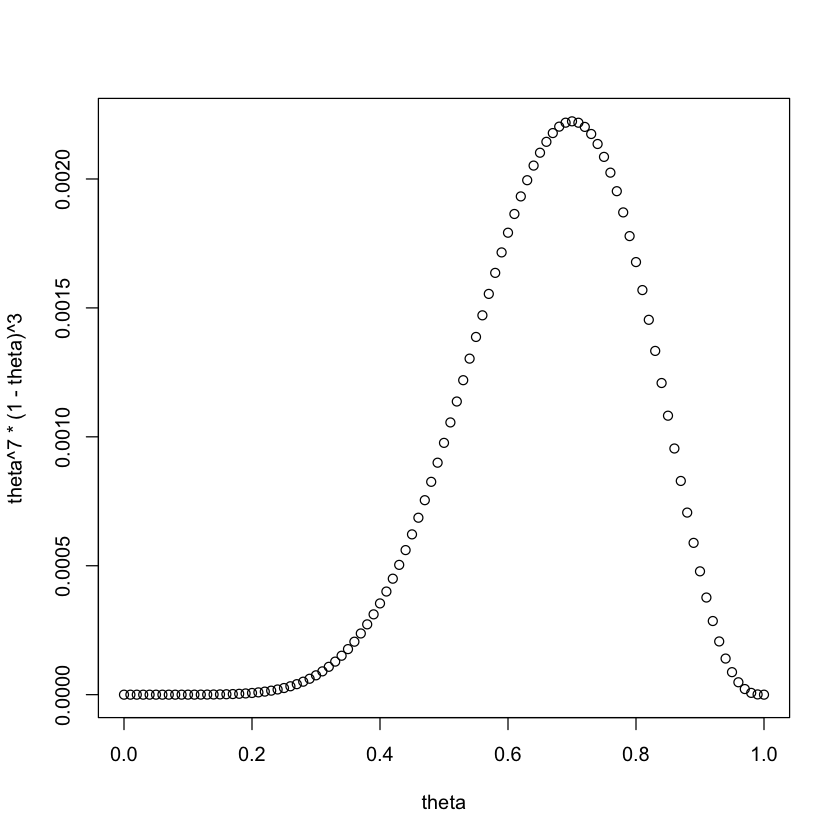

In [14]:
theta<-c(0:100)/100
print(theta)
cat("The maximum value is:" ,theta[which.max(theta^7*(1-theta)^3)])
plot(theta, theta^7*(1-theta)^3)


Thus, the most likely value of $\theta$ to produce this sequence of results is 0.7. All I've done is take the probability of observing a head at each trial and multiplied these together. If we simulate values of $\theta$, we find a single peaked function with a maximum value of 0.7. 


In particular, we have identified a value of $\theta$ in the population that was most likely to produce the observed data. In other words, we assume:
  
\begin{eqnarray}
p(y|\theta)=\prod_{n=1}^Np(y_n|\theta)=\prod_{n=1}^N\theta^{y_n}(1-\theta)^{1-{y_n}}
\end{eqnarray}

(Bishop 2006, page 69). If the sequence of results is ${H,H, T, H, T, T, T, T, T, T}$, if $\theta=0.1$, then we multiply $0.1 \times 0.1 \times 0.9 \times 0.1 \times 0.9^6$. By doing this for every value of $\theta$, we want to find the highest probabilty associated with $\theta$. This is precisely the logic of maximum likelihood: Observe a dataset and find a value of $\theta$ that is most likely to have produced that dataset. What you can see is that the function is peaked. There is only one value that maximizes the ``likelihood function'' which is simply:

\begin{eqnarray}
p(y|\theta)=\prod_{n=1}^Np(y_n|\theta)=\prod_{n=1}^N\theta^{y_n}(1-\theta)^{1-{y_n}}
\end{eqnarray}

I've solved the problem with a simulation. In fact, that's not required. In this case, there is a closed form solution to the problem.\footnote{In particular, we take the logarithm of the likelihood function, and solve by taking partial derivatives and setting these values to zero.}


In this example, you've probably noticed that the maximum likelihood estimate for $\theta$, given $n$ Bernoulli trials is simply $k/n$, where $k=\sum y_i$. We'll rely on this logic throughout the semester -- and we'll extend this considerably -- but for now it's really just important to conceptually understand the motivation, which is to find the most likely value of $\theta$ that produced the observed distribution of data.

As King (1998) notes, "Maximum Likelihood Estimation is a theory of point estimation that derives in this very direct way from the likelihood function. The maximum is not always a very good summary of the entire likelihood function, but it is very convenient and often useful'' (p. 24)


